In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import yodiipy

import numpy
import sklearn
import scipy
import pylab as plt
import random


### Some PCA and dimensino reduction worksheet

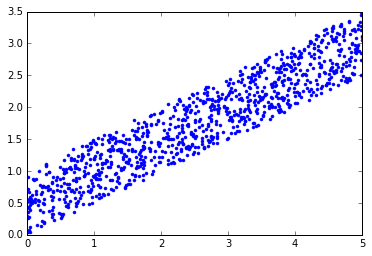

In [53]:
# make some data:
R1 = random.Random()
R2 = random.Random()
#
N_points = 1000
b_slope =.5
dx_dy = 5.
#
datas = []
for j in range(N_points):
    x = dx_dy*R1.random()
    y = R2.random() + b_slope*x
    #
    datas += [[x,y]]
#
datas = numpy.array(datas)
XY = datas
plt.figure()
ax1=plt.gca()
plt.plot(*zip(*datas), ls='', marker='.')

### PCA:
- First, get the covariance matrix. this is:
  - X_m = X - <X>_{col}
  - cov = X_m^TX_m
  - or: cov = numpy.cov(X)
- Then, get eigen-values $\lambda_j$ and eigen-vectors $\vec{e}_j$ of the covariance matrix.
  - you can do this manually (see any linear algebra text or Wikipedia)
  - ... or use numpy: numpy.linalbe.eig(X).
  - there are variations on .eig(), including Hermitian, .eigh(), etc. that make various assumptions about the symmetry and values in the matrix.
  

In [54]:
# now, pca it:
#
cov_xy = numpy.cov(datas.T)
lambdas, eigvs = numpy.linalg.eigh(cov_xy)

print(lambdas, numpy.sqrt(lambdas[1]/lambdas[0]))
print(eigvs)

[ 0.06306746  2.59437114] 6.41376999742
[[ 0.45924822 -0.88830799]
 [-0.88830799 -0.45924822]]


### More getting pca:
- "pca" is the covariance eigen-vectors sorted by corresponding eigen-value.
- the largest eigenvalue indicates the axis with the largest variability (presumably the largest 'signal').
- The $m \times m$ matrix made up of the eigen-vectors as columns is a rotation matrix to (??) the PCA frame
- Sort the eigen-values/vectors by eigen-value;
- keep the largest N pairs; this is an $m x n$ matrix, no longer square, but note that the columns have the same number of elements (rows) as the data points in the original data set.
- If so desired, the eigen-values can be used to re-scale the data along the principla axes, but this is not very commonly done.

- now, "dot" the data onto the reduced basis (compute the projection of these data onto the new, reduced basis). If we keep the entire basis, this is effectively a rotation into the PCA frame.
- Then, rotate the reduced data back to the original frame using the original PCA matrix.

In [69]:
#print(pca_R)
pcas = sorted(zip(lambdas, eigvs), key=lambda rw: rw[0])
print('pcas: ', pcas)

e_vals = [rw[0] for rw in pcas]
A_pca = numpy.array([rw[1] for rw in pcas])
print('**', A_pca)
#
# reduced basis
A_pca_r = A_pca[-1:]
#
print('A_pca:   {}'.format(A_pca))
print('A_pca_r: {}'.format(A_pca_r))
#
# data transformed onto the reduced basis:
XY_prime = numpy.dot(XY, A_pca_r.T)
#print('**', numpy.dot(XY, A_pca_r.T))
#
# now, rotate reduced data back to original frame.
XY_prime2 = numpy.dot(XY_prime, A_pca_r)
#

pcas:  [(0.063067460121899399, array([ 0.45924822, -0.88830799])), (2.5943711411598391, array([-0.88830799, -0.45924822]))]
** [[ 0.45924822 -0.88830799]
 [-0.88830799 -0.45924822]]
A_pca:   [[ 0.45924822 -0.88830799]
 [-0.88830799 -0.45924822]]
A_pca_r: [[-0.88830799 -0.45924822]]


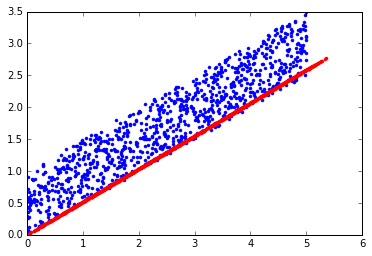

In [68]:
plt.figure()
plt.plot(*zip(*datas), ls='', marker='.', color='b')
plt.plot(*zip(*XY_prime2), marker='.', ls='', color='r')
#print('dot: {}'.format(numpy.dot(A_pca, XY.T)))

In [25]:
XY_prime = numpy.dot(datas, A_reduced)
print(XY_prime[0:10])

** [(0.066735317239152658, array([ 0.45366744, -0.89117106])), (2.7479173120560039, array([-0.89117106, -0.45366744]))]
[-1.63456041 -1.56065658 -1.72679179 -3.78231714 -3.30705088 -4.85121194
 -0.82349091 -3.00754532 -1.84726976 -2.84695204]


In [56]:
print(XY[0:5])

[[ 4.46279506  3.22050543]
 [ 3.41910593  1.71141795]
 [ 3.65120205  2.33721744]
 [ 4.5325672   2.47399542]
 [ 4.49101719  3.00451307]]
